In [1]:
!pip install langgraph

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.32.0 requires protobuf<5,>=3.20, but you have protobuf 5.29.3 which is incompatible.
tensorflow-intel 2.18.0 requires ml-dtypes<0.5.0,>=0.4.0, but you have ml-dtypes 0.5.1 which is incompatible.
tensorflow-intel 2.18.0 requires tensorboard<2.19,>=2.18, but you have tensorboard 2.19.0 which is incompatible.



     ---------------------------------------- 0.0/90.6 kB ? eta -:--:--
     ---------------------------------------- 90.6/90.6 kB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/42.9 kB ? eta -:--:--
     ---------------------------------------- 42.9/42.9 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/157.3 kB ? eta -:--:--
   ---------------------------------------- 157.3/157.3 kB 9.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/473.8 kB ? eta -:--:--
   --------------------------------------- 473.8/473.8 kB 15.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
   ---------------------------------------- 46.2/46.2 kB ? eta 0:00:00
   ---------------------------------------- 0.0/58.4 kB ? eta -:--:--
   ---------------------------------------- 58.4/58.4 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/463.6 kB ? eta -:--:--
   ------------------------------

In [3]:
from typing import Dict,TypedDict
from langgraph.graph import StateGraph   # framework that helps you design and manage the flow of your tasks in you application using a graph structure


In [5]:
# We now create an Agent State -- shared data structure that keeps track of information as your application runs

class AgentState(TypedDict):   #Our state schema
    message:str

In [7]:
def greeting_node(state:AgentState) -> AgentState:
    """Simple node that adds a greeting message to the state"""

    state['message']="Hey "+state["message"] + ", how is your day going?"
    return state

In [11]:
graph= StateGraph(AgentState)

graph.add_node("greeter", greeting_node)

graph.set_entry_point("greeter")
graph.set_finish_point("greeter")

app=graph.compile()

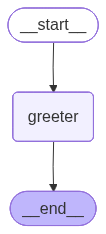

In [15]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [17]:
result=app.invoke({"message":"Hassan"})

In [19]:
result["message"]

'Hey Hassan, how is your day going?'